# Python
## Week 3:  More pandas and matplotlib

This tutorial was done under a project between  
[National Sun Yat-sen University](http://www.nsysu.edu.tw/?Lang=zh-tw) and [United Microelectronics Corporation](http://www.umc.com/chinese/).

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Jephian Lin</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

### DataFrame
There are various ways to create a `DataFrame`.

Use a list of `Series`.  
Each `Series` becomes a row.

In [109]:
s = pd.Series(np.arange(5))
df = pd.DataFrame([s,s * 100,s > 2])
df

,0,1,2,3,4
0,0,1,2,3,4
1,0,100,200,300,400
2,0,0,0,1,1


Use a list of dictionaries.  
Each dictionary becomes a row.  
The keys of the dictionaries becomes the names of columns.

In [117]:
d1 = {'weight': 50, 'height': 150}
d2 = {'weight': 60, 'height': 160}
d3 = {'weight': 70, 'height': 170}
df = pd.DataFrame([d1,d2,d3])
df

,height,weight
0,150,50
1,160,60
2,170,70


Read from a `csv` file by `pd.read_csv(filename)`.

In [136]:
df = pd.read_csv('clean_data.csv')
df

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
1,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


### DataFrame index and columns
If `df` is a `DataFrame`,  
`df.index` is the indices of the rows, while  
`df.columns` is the names of the columns.

In [137]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [138]:
df.columns

Index(['Name', 'HW1', 'HW2', 'HW3', 'HW4', 'HW5', 'HW6', 'HW7', 'HW8', 'HW9',
       'HW10', 'Midterm1', 'Midterm2', 'Final'],
      dtype='object')

You may use `.rename(dict)` to rename the indices or the columns.

In [141]:
df.rename({1:100})

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
100,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [142]:
df.rename({'Final': 'Final Exam'},axis=1)

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final Exam
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
1,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


`df.set_index(column name)` pick a column and set it as the index (row names).

In [149]:
df.set_index('Name')

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


### DataFrame selection
Use `.iloc[row index, column index]` or `.loc[row names, column names]` to **select** an entry.  

In [151]:
df = pd.read_csv('clean_data.csv')
df = df.set_index('Name')
df

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [155]:
print(df.iloc[0,2])
print(df.loc['Amy','HW3'])

1.5
1.5


Slicing allows you to select a sub-`DataFrame`.

In [156]:
df.loc[:,'HW1':'HW10']

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10
Name,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0


By default,  
`df.[column name]` selects a column, and  
`df.loc[row name]` selects a row.

In [147]:
df['HW7']

0    0.5
1    0.0
2    2.0
3    2.0
Name: HW7, dtype: float64

In [148]:
df.loc[2]

Name        Chris
HW1             2
HW2             2
HW3             1
HW4             1
HW5             2
HW6             2
HW7             2
HW8             1
HW9             0
HW10            0
Midterm1       19
Midterm2       24
Final           9
Name: 2, dtype: object

In [95]:
df.plot?

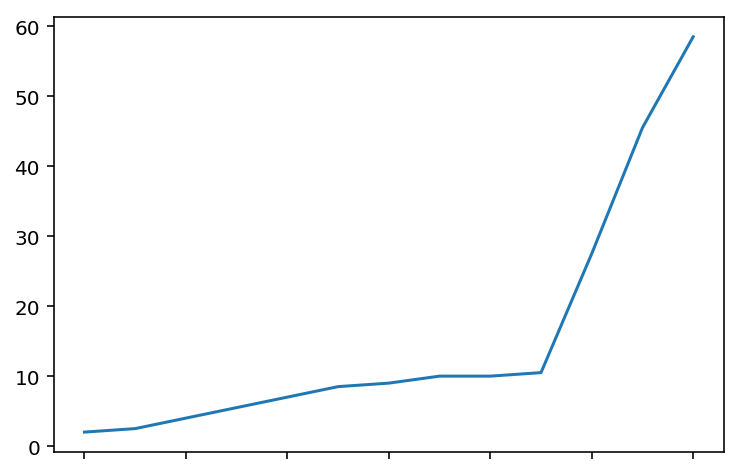

In [104]:
df.set_index('Name').loc['Amy'].cumsum().plot()

In [5]:
!head scores.csv

# Course '2018FMath354/2018FMath354'
# exported 2018-12-16T11:07:19.771Z
Name,Id,Email,grade: 2018FMath555/HW1,grade: 2018FMath555/HW2,grade: 2018FMath555/HW3,grade: 2018FMath555/HW4,grade: 2018FMath555/HW5,grade: 2018FMath555/HW6,grade: 2018FMath555/HW7,grade: 2018FMath555/HW8,grade: 2018FMath555/HW9,grade: 2018FMath555/HW10,grade: 2018FMath555/Midterm1,grade: 2018FMath555/Midterm2,grade: 2018FMath555/Final,comments: 2018FMath555/HW1,comments: 2018FMath555/HW2,comments: 2018FMath555/HW3,comments: 2018FMath555/HW4,comments: 2018FMath555/HW5,comments: 2018FMath555/HW6,comments: 2018FMath555/HW7,comments: 2018FMath555/HW8,comments: 2018FMath555/HW9,comments: 2018FMath555/HW10,comments: 2018FMath555/HW11,comments: 2018FMath555/Midterm1,comments: 2018FMath555/Midterm2,comments: 2018FMath555/Final
Amy,4561896523723189,amy@ggmail.com,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13,good,Well-done,keep going,ok,do it again,good,Well-done,keep going,ok,do it again,good,Well-done,keep going,ok
Bill,6

In [7]:
df = pd.read_csv('scores.csv',skiprows=2)

In [8]:
df

,Name,Id,Email,grade: 2018FMath555/HW1,grade: 2018FMath555/HW2,grade: 2018FMath555/HW3,grade: 2018FMath555/HW4,grade: 2018FMath555/HW5,grade: 2018FMath555/HW6,grade: 2018FMath555/HW7,...,comments: 2018FMath555/HW5,comments: 2018FMath555/HW6,comments: 2018FMath555/HW7,comments: 2018FMath555/HW8,comments: 2018FMath555/HW9,comments: 2018FMath555/HW10,comments: 2018FMath555/HW11,comments: 2018FMath555/Midterm1,comments: 2018FMath555/Midterm2,comments: 2018FMath555/Final
0,Amy,4561896523723189,amy@ggmail.com,2,0.5,1.5,1.5,1.5,1.5,0.5,...,do it again,good,Well-done,keep going,ok,do it again,good,Well-done,keep going,ok
1,Bill,6548915265745674,bill@ggmail.com,1,0.0,1.0,2.0,2.0,2.0,0.0,...,m…,nice,can be better,work harder!,well…,m…,nice,can be better,work harder!,well…
2,Chris,3206996875312559,chris@ggmail.com,2,2.0,1.0,1.0,2.0,2.0,2.0,...,excellent,great,try again,no comment,uh…,excellent,great,try again,no comment,uh…
3,Daniel,7913653789156327,daniel@ggmail.com,0,2.0,1.0,2.0,1.0,1.0,2.0,...,nice work,cool,nice,so far so good,None,nice work,cool,nice,so far so good,None


In [18]:

wanted = df.iloc[:,[0]+list(range(3,16))]

In [28]:
done = wanted.rename(columns=new_name)

In [61]:
df.loc[:,df.columns.str.startswith('grade')].sum(axis=1)

0    40.2
1     2.5
2    53.5
3    20.0
dtype: float64

### Graphs of a DataFrame

slicing, boolean slicing, view and copy, stack  
list: map, any, sum, max, min, zip, enumerate, sort  
string formating

slicing, boolean slicing, view and copy, stack  
list: map, any, sum, max, min, zip, enumerate, sort  
string formating

slicing, boolean slicing, view and copy, stack  
list: map, any, sum, max, min, zip, enumerate, sort  
string formating

slicing, boolean slicing, view and copy, stack  
list: map, any, sum, max, min, zip, enumerate, sort  
string formating